# Introduction
Welcome to my Kaggle project, Olist, where the main goal is to predict customer satisfaction using a score. The purpose of this project is to create a highly accurate prediction model that can identify potential problems with orders and alert OList's customer service team to take corrective measures in a timely manner.

To achieve this goal, I will be working with a vast database that allows me to create multiple features based on business logic and real-world correlations. By using this approach, I will be able to identify key factors that impact customer satisfaction, such as delivery time, product quality, and overall customer experience.

The success of this project will not only benefit OList but also its customers, as it will allow for prompt resolution of issues and improve overall satisfaction levels. Join me on this exciting journey as we explore the world of data analytics and predictive modeling to improve customer satisfaction for OList's valued customers.

# Organize


This project is divided into three main parts to ensure a thorough understanding and accurate prediction of customer satisfaction.

The first part involves understanding the data and performing feature engineering using SQL and Pandas. This step is crucial as it enables us to extract relevant information and identify key variables that influence customer satisfaction.

In the [second part](https://www.kaggle.com/code/gustavofelici/data-cleaning-and-analysis-uncovering-patterns), we will visualize the data to gain insights and create a model for predicting customer satisfaction. This involves exploring relationships between different features and identifying patterns that can be used to build a highly accurate model.

Finally, in the third part, we will employ machine learning techniques to train our model and make predictions based on the features we have identified. By using a combination of supervised and unsupervised learning methods, we can create a robust model that accurately predicts customer satisfaction levels and alerts OList's customer service team to any potential problems.

Together, these three parts form a comprehensive approach to analyzing customer satisfaction and providing OList with the tools and insights they need to improve customer experience and overall satisfaction levels.

## Data Base Schema

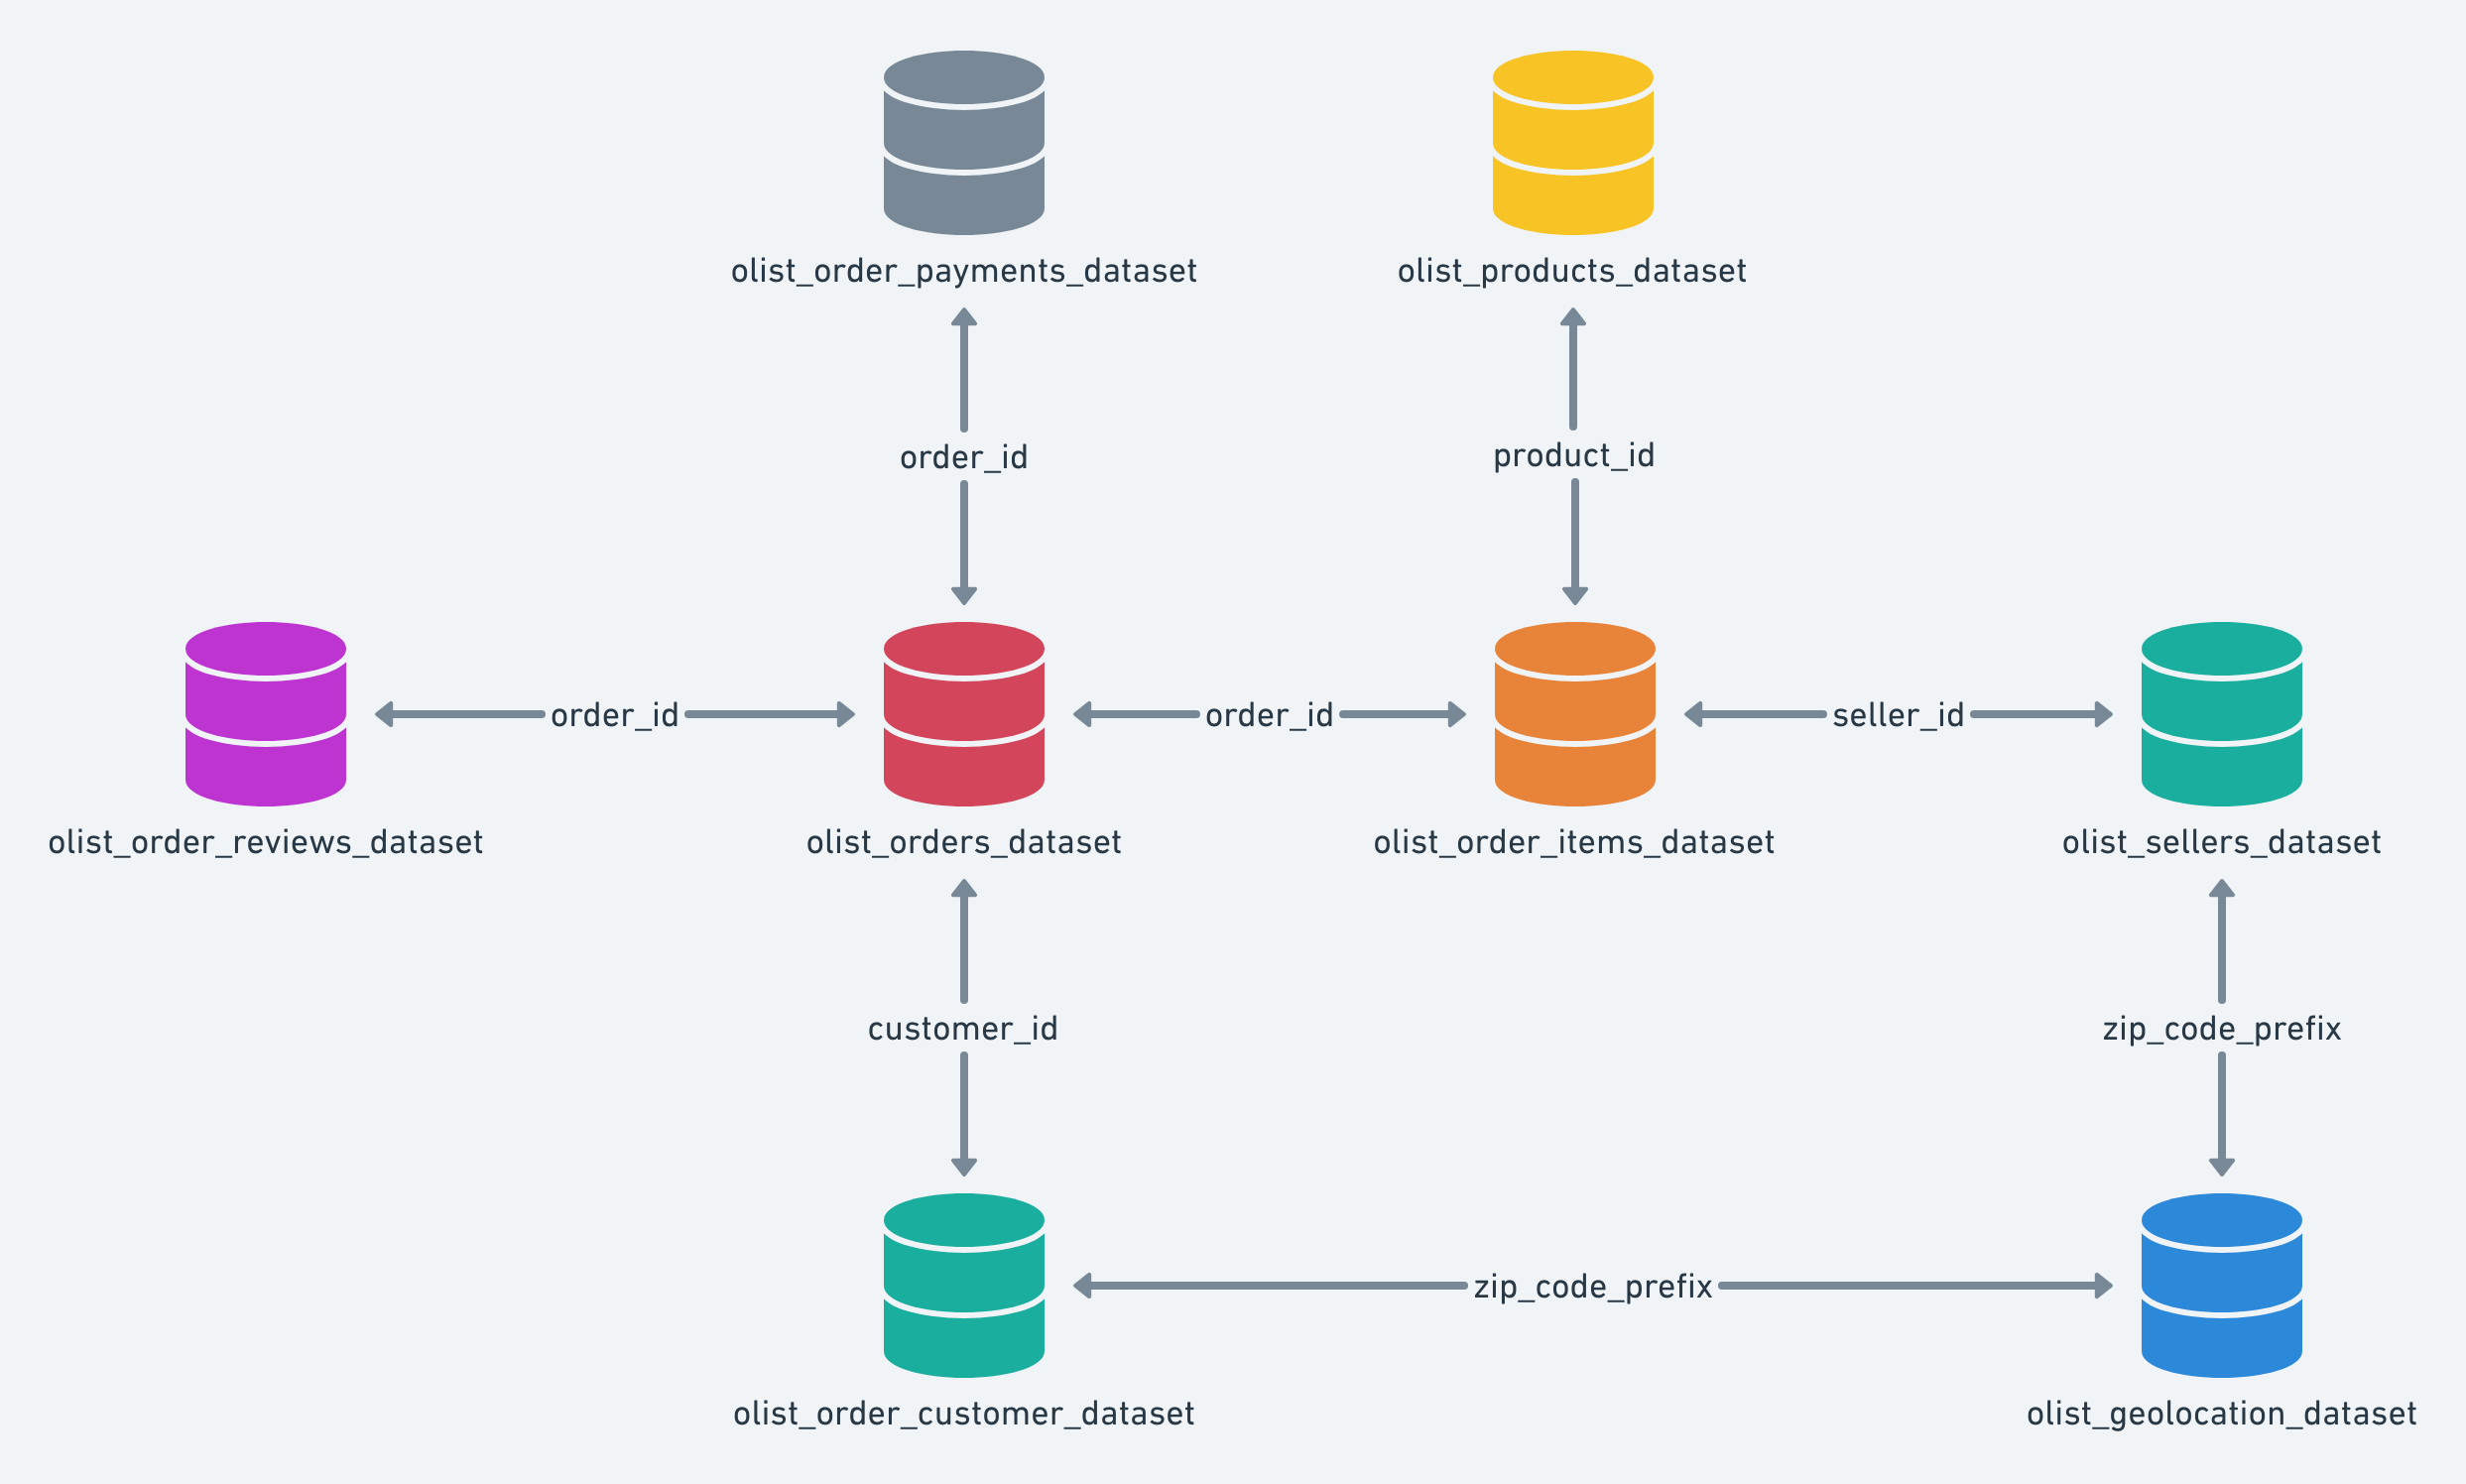

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Import libraries to establish a connection to MySQL server
import sqlite3
from sqlalchemy import create_engine, text

# Create SQL Engine

In [ ]:
engine = create_engine('sqlite://', echo = False)
conn = engine.connect()

In [ ]:
# Import data to dataframes
# linked with 'order_id', 'customer_id'
path = '/content/drive/MyDrive/Data Science/Projects/Olist/Input'
orders = pd.read_csv(f'{path}/olist_orders_dataset.csv')

# linked with 'order_id'
order_payments = pd.read_csv(f'{path}/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(f'{path}/olist_order_reviews_dataset.csv')

# linked with 'order_id', 'product_id', 'seller_id'
order_items = pd.read_csv(f'{path}/olist_order_items_dataset.csv')

# linked with 'product_id'
products = pd.read_csv(f'{path}/olist_products_dataset.csv')

# linked with 'seller_id', 'zip_cod_prefix'
sellers = pd.read_csv(f'{path}/olist_sellers_dataset.csv')

# linked with 'customer_id', 'zip_code_prefix'
customers = pd.read_csv(f'{path}/olist_customers_dataset.csv')

# linked with 'zip_code_prefix'
geolocation = pd.read_csv(f'{path}/olist_geolocation_dataset.csv')

# linked with 'product_category_name'
products_cat_translated = pd.read_csv(f'{path}/product_category_name_translation.csv')

In [ ]:
# export dataframes to database

orders.to_sql(name = 'Orders', con = engine)
order_payments.to_sql(name = 'OrderPayment', con = engine)
order_reviews.to_sql(name = 'OrderReview', con = engine)
order_items.to_sql(name = 'OrderItem', con = engine)

products.to_sql(name = 'Product', con = engine)
products_cat_translated.to_sql(name = 'products_cat_translated', con = engine)
sellers.to_sql(name = 'Seller', con = engine)
customers.to_sql(name = 'Customer', con = engine)

geolocation.to_sql(name = 'Geolocation', con = engine)

1000163

## SQL Function

In [ ]:
def get_query(query):   
  return pd.read_sql_query(text(query), conn)

features_query = {}

# Data Understanding
The first part of this project is focused on data understanding, which involves navigating through all the tables and columns to gain a comprehensive understanding of the data schema. Our main objective is to create insights into the features and variables that are relevant to predicting customer satisfaction.

During this process, we are not solely focused on selecting the best features for our model, but rather, we are collecting diverse hypotheses that we can test and explore in-depth. By taking this approach, we can identify potential relationships and patterns that are not immediately apparent and create a more nuanced understanding of the data.

We use a variety of tools and techniques, including SQL and Pandas, to explore the data and gain insights into the relationships between different variables. This involves examining data distributions, identifying outliers, and visualizing the data to identify potential correlations and trends.

Overall, this part of the project is critical to developing a comprehensive understanding of the data and laying the foundation for more advanced analysis and modeling in subsequent stages.

# Orders

In [ ]:
query = """
SELECT *
FROM Orders;
"""
get_query(query)

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


## `order_status`

In [ ]:
query = """
SELECT order_status, COUNT(order_id)
FROM Orders
GROUP BY order_status
ORDER BY order_purchase_timestamp DESC
;
"""
get_query(query)

,order_status,COUNT(order_id)
0,canceled,625
1,shipped,1107
2,created,5
3,unavailable,609
4,delivered,96478
5,processing,301
6,invoiced,314
7,approved,2


Seven Types

## Does a `customer_id` have multiple `orders_id`?

In [ ]:
query = """
SELECT customer_id, COUNT(order_id) as order_count
FROM Orders
WHERE order_status == 'delivered'
GROUP BY customer_id
ORDER BY 2 DESC
"""
get_query(query)

,customer_id,order_count
0,ffffa3172527f765de70084a7e53aae8,1
1,ffff42319e9b2d713724ae527742af25,1
2,fffeda5b6d849fbd39689bb92087f431,1
3,fffecc9f79fd8c764f843e9951b11341,1
4,fffcb937e9dd47a13f05ecb8290f4d3e,1
...,...,...
96473,000379cdec625522490c315e70c7a9fb,1
96474,0002414f95344307404f0ace7a26f1d5,1
96475,0001fd6190edaaf884bcaf3d49edf079,1
96476,000161a058600d5901f007fab4c27140,1


Each `customer_id` has one `order_id`

## What is the date range of the orders? 
I want to understand the volume of my data over time using `order_purchase_timestamp`

In [ ]:
query = """
SELECT MIN(order_purchase_timestamp) as first_date, 
  MAX(order_purchase_timestamp) as end_date
FROM Orders
;
"""
get_query(query)

,first_date,end_date
0,2016-09-04 21:15:19,2018-10-17 17:30:18


Most of the values are concentrated in the delivered, while the rest is unbalanced, this can occur because the statuses have an execution order and generate the log from the timestamps that the table has, so probably we will only work with the `delivered` orders because that is where the data tends to be complete

## Time difference between some features 
Let's visualize it to understand

How many days was it?
* `buy_to_approved`: From purchase to approval
* `aproved_to_carrier`: From approval to carrier
* `carrier_to_delivered`: From carrier to delivered
* `carrier_to_customer`: From carrier to customer
* `estimated`: From (carrier to customer) to (carrier to estimated)

In [ ]:
query = """
SELECT order_id, customer_id, order_status,
ROUND(JULIANDAY(order_approved_at) - JULIANDAY(order_purchase_timestamp)) AS buy_to_approved,
ROUND(JULIANDAY(order_delivered_carrier_date	) - JULIANDAY(order_approved_at)) AS aproved_to_carrier,
ROUND(JULIANDAY(order_estimated_delivery_date	) - JULIANDAY(order_delivered_carrier_date)) AS carrier_to_delivered,
ROUND(JULIANDAY(order_delivered_customer_date	) - JULIANDAY(order_delivered_carrier_date)) AS carrier_to_customer,
( ROUND(JULIANDAY(order_delivered_customer_date	) - JULIANDAY(order_delivered_carrier_date)) - ROUND(JULIANDAY(order_estimated_delivery_date	) - JULIANDAY(order_delivered_carrier_date))) AS estimated
FROM Orders
;
"""

date_features = get_query(query)
date_features

,order_id,customer_id,order_status,buy_to_approved,aproved_to_carrier,carrier_to_delivered,carrier_to_customer,estimated
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,0.0,2.0,13.0,6.0,-7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1.0,0.0,17.0,12.0,-5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,0.0,0.0,26.0,9.0,-17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,0.0,4.0,22.0,9.0,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,0.0,1.0,11.0,2.0,-9.0
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,0.0,1.0,18.0,7.0,-11.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,0.0,1.0,22.0,21.0,-1.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,0.0,1.0,29.0,24.0,-5.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,0.0,4.0,33.0,13.0,-20.0


In [ ]:
time_features = ['buy_to_approved', 'aproved_to_carrier', 'carrier_to_delivered', 'carrier_to_customer', 'estimated']

<Figure size 2000x400 with 0 Axes>

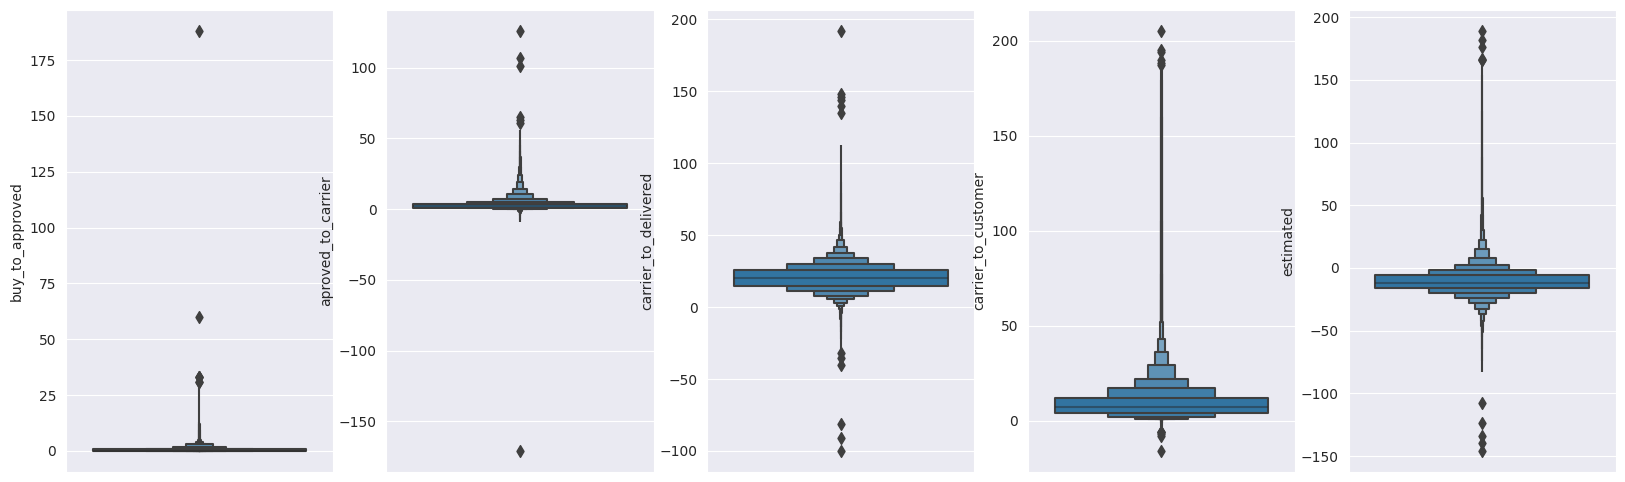

In [ ]:
plt.figure(figsize=(20,4))
fig, ax = plt.subplots(ncols=len(time_features), figsize=(20,6))
i=0
for feature in time_features:
  sns.boxenplot(y=date_features[feature], ax=ax[i])
  i+=1

It is better to do this date analysis inside python to use a calendar library to have more precise date ranges, but from this visualization we already have an idea.

## Final Query
The `features_query` is an essential step in this project, as it involves creating a dictionary of all the dataframes that we have generated during the data understanding and feature engineering stages. This dictionary is then used to concatenate all the dataframes into a final, comprehensive dataset that will be used for model creation.

By creating a single, unified dataset, we can ensure that all relevant features are included and that our model has access to the most comprehensive and accurate information possible. This final dataset is also crucial for ensuring that our model is consistent and reliable, as it eliminates any potential inconsistencies or errors that may arise from working with multiple, separate datasets.

Overall, the final query represents a critical step in the data preparation and feature engineering process, and it sets the stage for the development of a highly accurate and effective model for predicting customer satisfaction.

In [ ]:
query = """
SELECT *
FROM Orders
"""
features_query['Orders'] = get_query(query).drop(['index', 'customer_id'], axis=1)
features_query['Orders'] 

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


# Order Payment

In [ ]:
query = """
SELECT *
FROM OrderPayment
;
"""
get_query(query)

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


## Exploring the columns...

### `payment_sequential`

In [ ]:
query = """
SELECT payment_sequential, COUNT(order_id), AVG(payment_value)
FROM OrderPayment
GROUP BY payment_sequential
ORDER BY 2 DESC, 1
"""

get_query(query)

,payment_sequential,COUNT(order_id),AVG(payment_value)
0,1,99360,158.336774
1,2,3039,79.101849
2,3,581,30.417711
3,4,278,23.265432
4,5,170,23.895882
5,6,118,24.061610
6,7,82,20.672439
7,8,54,13.437407
8,9,43,13.521628
9,10,34,15.617353


It looks like something like payment attempts because the quantity is decreasing and a `payment_sequence` has a relation of many to an `order_id`, so I don't believe it is something like installments because the order_id volume decreases a lot after the first one

### `payment_type`

In [ ]:
query = """
SELECT payment_type, COUNT(order_id), AVG(payment_value)
FROM OrderPayment
GROUP BY payment_type
ORDER BY 2 DESC
;
"""
get_query(query)

,payment_type,COUNT(order_id),AVG(payment_value)
0,credit_card,76795,163.319021
1,boleto,19784,145.034435
2,voucher,5775,65.703354
3,debit_card,1529,142.570170
4,not_defined,3,0.000000


####  Let's take a look at payment_type to see if it can change according to payment_sequential

In [ ]:
query = """
SELECT order_id, payment_sequential, payment_type, payment_value
FROM OrderPayment
WHERE payment_sequential = 18
;
"""
get_query(query).head(1)

,order_id,payment_sequential,payment_type,payment_value
0,285c2e15bebd4ac83635ccc563dc71f4,18,voucher,1.7


Escolhido: `285c2e15bebd4ac83635ccc563dc71f4`

In [ ]:
query = """
SELECT payment_sequential, payment_type, payment_installments,  payment_value
FROM OrderPayment
WHERE order_id = '285c2e15bebd4ac83635ccc563dc71f4'
ORDER BY payment_sequential ASC
;
"""
get_query(query)

,payment_sequential,payment_type,payment_installments,payment_value
0,1,credit_card,1,1.62
1,2,voucher,1,1.24
2,3,voucher,1,1.40
3,4,voucher,1,2.89
4,5,voucher,1,1.75
5,6,voucher,1,2.85
6,7,voucher,1,1.14
7,8,voucher,1,1.23
8,9,voucher,1,1.05
9,10,voucher,1,2.78


Ok, the payment_type can change and the payment values change too, apparently it is some kind of error in the payment itself, the values vary in a way that I don't see much sense, but it is not a big variation


### `payment_installments`

In [ ]:
query = """
SELECT payment_installments, COUNT(order_id), AVG(payment_value)
FROM OrderPayment
GROUP BY payment_installments
ORDER BY 1 ASC, 2 DESC
;
"""
get_query(query)

,payment_installments,COUNT(order_id),AVG(payment_value)
0,0,2,94.315000
1,1,52546,112.420229
2,2,12413,127.228150
3,3,10461,142.539317
4,4,7098,163.976840
5,5,5239,183.465222
6,6,3920,209.849952
7,7,1626,187.673672
8,8,4268,307.737427
9,9,644,203.440870


I'm not sure what it means, but it seems to be some kind of payment problem, but I'm not sure because most of the data is not concentrated in any of these `payment_installments`

## Final Query
This is how I will analyze this data for each order

In [ ]:
query = """
SELECT 
  *
FROM OrderPayment
;
"""
features_query['OrderPayment'] = get_query(query)
features_query['OrderPayment'] 

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
agg = {
    'payment_sequential': max,
    'payment_type': [min, max, 'nunique'],
    'payment_installments': max,
    'payment_value':['nunique', np.mean,  np.std]
}

df_agg = features_query['OrderPayment'].groupby('order_id').agg(agg)
df_agg = df_agg.set_axis([col + "_" + func for col, func in df_agg.columns], axis=1)

features_query['OrderPayment'] = df_agg

### Testing

In [ ]:
query = """
SELECT 
  *
FROM OrderPayment
WHERE order_id = 'ea9184ad433a404df1d72fa0a8764232'
;
"""
get_query(query)

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,121,ea9184ad433a404df1d72fa0a8764232,4,voucher,1,22.49
1,40168,ea9184ad433a404df1d72fa0a8764232,1,credit_card,1,17.78
2,78613,ea9184ad433a404df1d72fa0a8764232,3,voucher,1,22.49
3,94151,ea9184ad433a404df1d72fa0a8764232,2,voucher,1,22.49
4,99425,ea9184ad433a404df1d72fa0a8764232,5,voucher,1,22.47


In [ ]:
features_query['OrderPayment'].loc['ea9184ad433a404df1d72fa0a8764232']

payment_sequential_max                5
payment_type_min            credit_card
payment_type_max                voucher
payment_type_nunique                  2
payment_installments_max              1
payment_value_nunique                 3
payment_value_mean               21.544
payment_value_std              2.104158
Name: ea9184ad433a404df1d72fa0a8764232, dtype: object

# Order Review
In this part in the modelation we use only `review_score` column, other columns such as review comments or creation date are not considered for prediction purposes because they are generated after the customer has reviewed the product or service. Instead, we focus on features that are created before the customer provides a review. This allows us to capture the most relevant and actionable data and develop a model that accurately predicts customer satisfaction levels.

In [ ]:
query = """
SELECT *
FROM OrderReview;
"""
get_query(query)

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...,...
99219,99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


## How many reviews does an order have? 
One to one or many to one

In [ ]:
query = """
SELECT order_id, COUNT(review_id), MAX(review_creation_date), AVG(review_score)
FROM OrderReview
GROUP BY order_id
HAVING COUNT(review_id) > 1
ORDER BY MAX(review_creation_date) DESC

;
"""
get_query(query)

,order_id,COUNT(review_id),MAX(review_creation_date),AVG(review_score)
0,f3ee55bf50ef2f2318599425ef80107d,2,2018-08-29 00:00:00,4.5
1,dab8a6c6bd6ec448df5b3a6b6cb887bc,2,2018-08-22 00:00:00,3.5
2,84aa61a900410cfe26b57337d376a1ae,2,2018-08-22 00:00:00,5.0
3,80fe5b2fe4869330fabbceea5e5e7c0c,2,2018-08-11 00:00:00,5.0
4,3e93213bb8fdda91186b4018b2fe0030,2,2018-08-08 00:00:00,5.0
...,...,...,...,...
542,566f53fc7d36fa366f7e221468121877,2,2017-02-08 00:00:00,5.0
543,2a3d67c0d2045bf67abb3d8f320ac29f,2,2017-01-31 00:00:00,5.0
544,b6e5aa946acc4e29e7069510f28a0bce,2,2017-01-29 00:00:00,5.0
545,c4f710df20f7d1500da1aef81a993f65,2,2016-10-29 00:00:00,5.0


There is one order for several reviews, but there are few cases that this happens, only 547 times, and they are cases where an order has two reviews

Of these small cases of more than one review, let's look at how they work

In [ ]:
query = """
SELECT *
FROM OrderReview
WHERE order_id = '03c939fd7fd3b38f8485a0f95798f1f6'
ORDER BY review_answer_timestamp ASC
;
"""
get_query(query).head()

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,69438,405eb2ea45e1dbe2662541ae5b47e2aa,03c939fd7fd3b38f8485a0f95798f1f6,3,None,Seria ótimo se tivesem entregue os 3 (três) pe...,2018-03-06 00:00:00,2018-03-06 19:50:32
1,8273,b04ed893318da5b863e878cd3d0511df,03c939fd7fd3b38f8485a0f95798f1f6,3,None,Um ponto negativo que achei foi a cobrança de ...,2018-03-20 00:00:00,2018-03-21 02:28:23
2,51527,f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,03c939fd7fd3b38f8485a0f95798f1f6,4,None,None,2018-03-29 00:00:00,2018-03-30 00:29:09


I looked at some of these cases, the variation between the scores was not big, nobody gave 1 after 5, what will make more sense in these cases is to use the max value to maintain the standard of the score

## Negative Comments

In [ ]:
query = """
SELECT review_comment_title,review_comment_message, review_creation_date	
FROM OrderReview
WHERE review_score = 1
ORDER BY review_creation_date DESC
;
"""
get_query(query)

,review_comment_title,review_comment_message,review_creation_date
0,Informação\preocupada,Minha avaliação ta sendo esta pq aqui aparece ...,2018-08-31 00:00:00
1,None,None,2018-08-31 00:00:00
2,Não recebi meu produto,Não recebi meu produto e ainda não respondem m...,2018-08-31 00:00:00
3,Vcs precisam melhorar,O pedido se tratava de 5 frascos de oleo de li...,2018-08-31 00:00:00
4,Muito frágil !!!,"Achei o produto muito pequeno e onde fica a ""t...",2018-08-31 00:00:00
...,...,...,...
11419,None,Produto não foi entregue. Não foi enviada nota...,2016-10-20 00:00:00
11420,None,Comprei uma capa para um tablet e a que foi en...,2016-10-20 00:00:00
11421,None,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09 00:00:00
11422,None,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00


## Score
How many reviews per score?

In [ ]:
query = """
SELECT review_score, COUNT(review_id)
FROM OrderReview
GROUP BY review_score
;
"""
get_query(query)

,review_score,COUNT(review_id)
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


## How many people put title in the review?
`review_comment_title`
1. Do people not put in a date because of some update that occurred in the system? If yes, from some point in time this happened or stopped happening

In [ ]:
query = """
SELECT review_comment_title, review_creation_date

FROM OrderReview
WHERE review_comment_title IS NOT NULL
ORDER BY review_creation_date DESC
;
"""
get_query(query)

,review_comment_title,review_creation_date
0,Entrega de encomenda,2018-08-31 00:00:00
1,capa de notbuk,2018-08-31 00:00:00
2,Ótimo,2018-08-31 00:00:00
3,Ótimo,2018-08-31 00:00:00
4,Ótima,2018-08-31 00:00:00
...,...,...
11563,Recomendo,2017-10-27 00:00:00
11564,A câmera não funcionou,2017-09-13 00:00:00
11565,Muito bom.,2017-09-01 00:00:00
11566,otimo,2017-06-29 00:00:00


That's right as of 2017-05-16 we started putting titles in the comments

In [ ]:
query = """
SELECT COUNT(review_id)
FROM OrderReview
;
"""
get_query(query)

,COUNT(review_id)
0,99224


In [ ]:
str((11568  / 99224) * 100) + ' % of the requests that have a title in the comments'

'11.658469725066515 % of the requests that have a title in the comments'

## Final Query

In [ ]:
query = """
SELECT order_id,  
MAX(review_score) as score

FROM OrderReview
GROUP BY order_id
;
"""
features_query['OrderReview'] = get_query(query)
features_query['OrderReview'] 

,order_id,score
0,00010242fe8c5a6d1ba2dd792cb16214,5
1,00018f77f2f0320c557190d7a144bdd3,4
2,000229ec398224ef6ca0657da4fc703e,5
3,00024acbcdf0a6daa1e931b038114c75,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,5
...,...,...
98668,fffc94f6ce00a00581880bf54a75a037,5
98669,fffcd46ef2263f404302a634eb57f7eb,5
98670,fffce4705a9662cd70adb13d4a31832d,5
98671,fffe18544ffabc95dfada21779c9644f,5


# Order Item

In [ ]:
query = """
SELECT *
FROM OrderItem;
"""
get_query(query)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


## Possible Features
* `Average price per product`: Average of the product prices in each order, this information as a feature. It can indicate the purchasing power of the customer and the demand for products in different price ranges.

* `Quantity of products per order`: How many products were purchased in each order. Can indicate the customer's level of engagement with your store and their willingness to make larger or smaller purchases.

* `Number of vendors per order`: How many different vendors are involved in each order. It can indicate the diversity of products and the range of options your store offers customers.

* `Average price per salesperson`: Average prices of products sold by each salesperson. It can indicate the quality of products offered by each seller and their reputation on the platform.

* `Shipping limit per merchant`: Each merchant's shipping limit. It can indicate the availability of products in stock and each seller's ability to meet delivery deadlines.

* `Average freight price`: Average freight prices for each order and use this information as a feature. It can indicate the level of customer satisfaction with the cost of delivery and the efficiency of your logistics operation.



## Questions

### Quantity of items per order

In [ ]:
query = """
SELECT order_id,
COUNT(DISTINCT(product_id)) as count_product,
COUNT(DISTINCT(seller_id)) as count_seller,
MAX(order_item_id) as count_item

FROM OrderItem
GROUP BY order_id
ORDER BY 3 DESC
;
"""
get_query(query)

,order_id,count_product,count_seller,count_item
0,cf5c8d9f52807cb2d2f0a0ff54c478da,6,5,6
1,1c11d0f4353b31ac3417fbfa5f0f2a8a,6,5,7
2,91be51c856a90d7efe86cf9d082d6ae3,4,4,4
3,8c2b13adf3f377c8f2b06b04321b0925,4,4,4
4,1d23106803c48c391366ff224513fb7f,4,4,4
...,...,...,...,...
98661,00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1
98662,00024acbcdf0a6daa1e931b038114c75,1,1,1
98663,000229ec398224ef6ca0657da4fc703e,1,1,1
98664,00018f77f2f0320c557190d7a144bdd3,1,1,1


Looking at one order
`cf5c8d9f52807cb2d2f0a0ff54c478da`

In [ ]:
query = """
SELECT *
FROM OrderItem
WHERE order_id = 'cf5c8d9f52807cb2d2f0a0ff54c478da'
;
"""
get_query(query)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,91379,cf5c8d9f52807cb2d2f0a0ff54c478da,1,064c975d37d3c646bd94d94c6e16f37e,a5ff20ff766e7f50bd5066f33da14413,2018-08-28 13:24:27,17.99,9.00
1,91380,cf5c8d9f52807cb2d2f0a0ff54c478da,2,7b44e5ea770ef06810f5df89006cc8b2,c003204e1ab016dfa150abc119207b24,2018-08-28 13:24:27,88.90,9.00
2,91381,cf5c8d9f52807cb2d2f0a0ff54c478da,3,58f579bb52bea63fe1c6c39c2d4272d8,a5ff20ff766e7f50bd5066f33da14413,2018-08-28 13:24:27,18.60,9.00
3,91382,cf5c8d9f52807cb2d2f0a0ff54c478da,4,64ec83de8f0026319c8829351e3d6e23,138dbe45fc62f1e244378131a6801526,2018-08-28 13:24:27,13.90,9.00
4,91383,cf5c8d9f52807cb2d2f0a0ff54c478da,5,24543438ec09114a42a153f76ae693f2,1fa2d3def6adfa70e58c276bb64fe5bb,2018-08-30 13:24:27,6.90,9.00
5,91384,cf5c8d9f52807cb2d2f0a0ff54c478da,6,a7bbff32c7321478b29f924301a1867d,dfc475d54e1b6dbeeb7d7d9bdaa63827,2018-09-12 13:24:27,16.90,8.99


Another Late Delivery Date? 
(shipping_limit_date to carrier(Orders Table))

### Final Query

In [ ]:
query = """
SELECT 
*
FROM OrderItem
;
"""
features_query['OrderItem'] = get_query(query)
features_query['OrderItem']

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
agg = {
    'order_item_id': 'nunique',
    'product_id': 'nunique',
    'seller_id': 'nunique',
    'shipping_limit_date': max,
    'price': ['nunique', np.mean, np.std],
    'freight_value': [np.mean, np.std]
}

df_agg = features_query['OrderItem'].groupby('order_id').agg(agg)
df_agg = df_agg.set_axis([col + "_" + func for col, func in df_agg.columns], axis=1)

features_query['OrderItem'] = df_agg
features_query['OrderItem'].head()

,order_item_id_nunique,seller_id_nunique,product_id_nunique,shipping_limit_date_max,price_nunique,price_mean,price_std,freight_value_mean,freight_value_std
order_id,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,2017-09-19 09:45:35,1,58.90,NaN,13.29,NaN
00018f77f2f0320c557190d7a144bdd3,1,1,1,2017-05-03 11:05:13,1,239.90,NaN,19.93,NaN
000229ec398224ef6ca0657da4fc703e,1,1,1,2018-01-18 14:48:30,1,199.00,NaN,17.87,NaN
00024acbcdf0a6daa1e931b038114c75,1,1,1,2018-08-15 10:10:18,1,12.99,NaN,12.79,NaN
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,2017-02-13 13:57:51,1,199.90,NaN,18.14,NaN


# Product

In [ ]:
query = """
SELECT *
FROM Product;
"""
get_query(query)

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...
32946,32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


## Ideas
1. Identify the category of the most popular products in my store using the `product_category_name` information
2. Identify which products have the most complete and appealing descriptions to customers using the `product_name_lenght` and `product_description_length` information.
3. Identify which products have the most photos in my store using the information from `product_photos_qty`.
4. Understand the physical dimensions of the products in my store using the information from `product_weight_g`, `product_length_cm`, `product_height_cm` and `product_width_cm`.
5. Calculate the average price of products in each product category using the information from `product_category_name`.
6. Calculate the average weight of the products in each product category using the information from `product_category_name`.

## `product_category_name`

In [ ]:
query = """
SELECT product_category_name, COUNT(product_id) AS QTD
FROM Product
GROUP BY product_category_name
ORDER BY 2 DESC;
"""
get_query(query)

,product_category_name,QTD
0,cama_mesa_banho,3029
1,esporte_lazer,2867
2,moveis_decoracao,2657
3,beleza_saude,2444
4,utilidades_domesticas,2335
...,...,...
69,fashion_roupa_infanto_juvenil,5
70,casa_conforto_2,5
71,pc_gamer,3
72,seguros_e_servicos,2


## Final Query

In [ ]:
query = """
SELECT 
o.order_id, i.order_item_id, pd.*
FROM Orders AS o
LEFT JOIN OrderItem AS i
ON i.order_id = o.order_id
LEFT JOIN Product AS pd
ON i.product_id = pd.product_id
Order BY 2 DESC, 1

"""
features_query['Product'] = get_query(query)
features_query['Product']

,order_id,order_item_id,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,8272b63d03f5f79c56e9e4120aec44ef,21.0,1962.0,79ce45dbc2ea29b22b5a261bbb7b7ee7,beleza_saude,27.0,152.0,2.0,1000.0,25.0,6.0,12.0
1,1b15974a0141d54e36626dca3fdc731a,20.0,27921.0,ee3d532c8a438679776d222e997606b3,informatica_acessorios,43.0,452.0,1.0,360.0,19.0,18.0,15.0
2,8272b63d03f5f79c56e9e4120aec44ef,20.0,2742.0,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0
3,ab14fdcfbe524636d65ee38360e22ce8,20.0,25654.0,9571759451b1d780ee7c15012ea109d4,automotivo,39.0,1042.0,1.0,1400.0,20.0,31.0,30.0
4,1b15974a0141d54e36626dca3fdc731a,19.0,27921.0,ee3d532c8a438679776d222e997606b3,informatica_acessorios,43.0,452.0,1.0,360.0,19.0,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
113420,fdcca0e15a4d03e3fb89fb14664a3744,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113421,fddbd183387b5c9bcbafbd0fe965301f,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113422,fe87d4b944748f63ca5ed22cc55b6fb6,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113423,feae5ecdf2cc16c1007741be785fe3cd,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
agg = {
    'product_category_name': 'nunique',
    'product_name_lenght': ['sum', np.mean, np.std],
    'product_description_lenght': ['sum', np.mean, np.std],
    'product_photos_qty': ['sum', np.mean, np.std],
    'product_weight_g': ['sum', np.mean, np.std],
    'product_length_cm': ['sum', np.mean, np.std],
    'product_height_cm': ['sum', np.mean, np.std],
    'product_width_cm': ['sum', np.mean, np.std]
}

df_agg = features_query['Product'].groupby('order_id').agg(agg)
df_agg = df_agg.set_axis([col + "_" + func for col, func in df_agg.columns], axis=1)

features_query['Product'] = df_agg
features_query['Product'].head()

,product_category_name_nunique,product_name_lenght_sum,product_name_lenght_mean,product_name_lenght_std,product_description_lenght_sum,product_description_lenght_mean,product_description_lenght_std,product_photos_qty_sum,product_photos_qty_mean,product_photos_qty_std,...,product_weight_g_std,product_length_cm_sum,product_length_cm_mean,product_length_cm_std,product_height_cm_sum,product_height_cm_mean,product_height_cm_std,product_width_cm_sum,product_width_cm_mean,product_width_cm_std
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,58.0,58.0,NaN,598.0,598.0,NaN,4.0,4.0,NaN,...,NaN,28.0,28.0,NaN,9.0,9.0,NaN,14.0,14.0,NaN
00018f77f2f0320c557190d7a144bdd3,1,56.0,56.0,NaN,239.0,239.0,NaN,2.0,2.0,NaN,...,NaN,50.0,50.0,NaN,30.0,30.0,NaN,40.0,40.0,NaN
000229ec398224ef6ca0657da4fc703e,1,59.0,59.0,NaN,695.0,695.0,NaN,2.0,2.0,NaN,...,NaN,33.0,33.0,NaN,13.0,13.0,NaN,33.0,33.0,NaN
00024acbcdf0a6daa1e931b038114c75,1,42.0,42.0,NaN,480.0,480.0,NaN,1.0,1.0,NaN,...,NaN,16.0,16.0,NaN,10.0,10.0,NaN,15.0,15.0,NaN
00042b26cf59d7ce69dfabb4e55b4fd9,1,59.0,59.0,NaN,409.0,409.0,NaN,1.0,1.0,NaN,...,NaN,35.0,35.0,NaN,40.0,40.0,NaN,30.0,30.0,NaN


# Product Translation

In [ ]:
query = """
SELECT *
FROM products_cat_translated;
"""
get_query(query)

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# Location

## Seller

In [ ]:
query = """
SELECT *
FROM Seller;
"""
get_query(query)

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...,...
3090,3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Order quantity per seller

In [ ]:
query = """
SELECT i.seller_id,
s.seller_city,
s.seller_state,
COUNT(i.order_id),
SUM(i.price),
SUM(i.freight_value),
AVG(i.price),
AVG(i.freight_value),
SUM(p.payment_value),
AVG(p.payment_value)

FROM OrderItem as i
INNER JOIN Seller as s
ON i.seller_id = s.seller_id
INNER JOIN OrderPayment as p
ON p.order_id = i.order_id
GROUP BY i.seller_id
ORDER BY COUNT(i.order_id) DESC

;
"""
get_query(query)

,seller_id,seller_city,seller_state,COUNT(i.order_id),SUM(i.price),SUM(i.freight_value),AVG(i.price),AVG(i.freight_value),SUM(p.payment_value),AVG(p.payment_value)
0,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,2133,213299.57,37335.72,99.999798,17.503854,301245.27,141.230788
1,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,2122,128489.82,29277.64,60.551282,13.797191,179657.75,84.664350
2,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP,2008,111435.81,37274.85,55.495921,18.563172,290253.42,144.548516
3,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,1847,108439.73,26658.66,58.711278,14.433492,141309.58,76.507623
4,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP,1639,169297.77,26453.28,103.293331,16.139890,272219.32,166.088664
...,...,...,...,...,...,...,...,...,...,...
3090,04ee0ec01589969663ba5967c0e0bdc0,lajeado,RS,1,289.49,24.83,289.490000,24.830000,314.32,314.320000
3091,00d8b143d12632bad99c0ad66ad52825,belo horizonte,MG,1,86.00,51.10,86.000000,51.100000,137.10,137.100000
3092,00ab3eff1b5192e5f1a63bcecfee11c8,sao paulo,SP,1,98.00,12.08,98.000000,12.080000,110.08,110.080000
3093,003554e2dce176b5555353e4f3555ac8,goiania,GO,1,120.00,19.38,120.000000,19.380000,139.38,139.380000


## Customer

In [ ]:
query = """
SELECT *
FROM Customer;
"""
get_query(query)

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...
99436,99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Strange how this customer_unique_id works, how many customer_id does each customer_unique_id have?

In [ ]:
query = """
SELECT customer_unique_id, COUNT(customer_id) as count_customer
FROM Customer
GROUP BY customer_unique_id
HAVING count_customer > 1
ORDER BY count_customer DESC
;
"""
values = get_query(query)
values

,customer_unique_id,count_customer
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,ca77025e7201e3b30c44b472ff346268,7
3,6469f99c1f9dfae7733b25662e7f1782,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...,...
2992,00a39521eb40f7012db50455bf083460,2
2993,0058f300f57d7b93c477a131a59b36c3,2
2994,004b45ec5c64187465168251cd1c9c2f,2
2995,004288347e5e88a27ded2bb23747066c,2


So I can see the relationship of how many purchases a person made from this? 
Let's test

In [ ]:
query = """

SELECT 
  c.customer_unique_id , 
  COUNT(DISTINCT(c.customer_id)) ,
  COUNT(DISTINCT(o.order_id)) ,
  COUNT(DISTINCT(i.product_id)),
  MAX(order_purchase_timestamp)
  
FROM Customer AS c
INNER JOIN Orders AS o
  ON c.customer_id = o.customer_id
INNER JOIN OrderItem AS i
  ON o.order_id = i.order_id
GROUP BY c.customer_unique_id
HAVING COUNT(DISTINCT(i.product_id)) > 1
ORDER BY 3 DESC

;
"""
get_query(query)


,customer_unique_id,COUNT(DISTINCT(c.customer_id)),COUNT(DISTINCT(o.order_id)),COUNT(DISTINCT(i.product_id)),MAX(order_purchase_timestamp)
0,8d50f5eadf50201ccdcedfb9e2ac8455,16,16,15,2018-08-20 19:14:26
1,3e43e6105506432c953e165fb2acf44c,9,9,13,2018-02-27 18:36:39
2,ca77025e7201e3b30c44b472ff346268,7,7,9,2018-06-01 11:38:29
3,6469f99c1f9dfae7733b25662e7f1782,7,7,5,2018-06-28 00:43:34
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7,7,9,2018-02-14 13:22:12
...,...,...,...,...,...
5451,001928b561575b2821c92254a2327d06,1,1,2,2018-08-24 21:17:00
5452,001926cef41060fae572e2e7b30bd2a4,1,1,2,2017-08-17 12:55:47
5453,000fbf0473c10fc1ab6f8d2d286ce20c,1,1,2,2018-07-26 09:43:52
5454,000de6019bb59f34c099a907c151d855,1,1,2,2017-08-17 19:10:33


It still seems like very small amounts, it's not possible that one person only made 16 purchases at most, that must be in relation to something else, I don't know

I can test if the address between a single `customer_unique_id`
* Testing : `3e43e6105506432c953e165fb2acf44c`



In [ ]:
query = """

SELECT *
FROM Customer
WHERE customer_unique_id == '3e43e6105506432c953e165fb2acf44c'
;
"""
get_query(query)

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,5113,f37a14140ac3a8efbb4d2eab6585edb7,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP
1,6129,a4413edae691fd0d28bd04b8a38b259d,3e43e6105506432c953e165fb2acf44c,11700,praia grande,SP
2,8657,1815fdaaae692479110428598596b5e5,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP
3,10685,e68e6423401e85c138229b23d4bf4761,3e43e6105506432c953e165fb2acf44c,11700,praia grande,SP
4,20597,b63c9cfc5dcb06ed307ca95957fa216c,3e43e6105506432c953e165fb2acf44c,11704,praia grande,SP
5,50029,2bbd32d4ef14893d2d8c1a0df08403cf,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP
6,64987,b70f8552b91ef49129519206966e2472,3e43e6105506432c953e165fb2acf44c,11700,praia grande,SP
7,89979,6b92dda6e324283dbe4969c443e3bf1a,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP
8,90706,06ec7aed3161859018db02f695b6600d,3e43e6105506432c953e165fb2acf44c,11701,praia grande,SP


From the cases that I have analyzed the change is usually in the customer_zip_code in small variations, so could it be address variations? It is not possible to conclude.

## Final Query

In [ ]:
query = """
SELECT 
--OrderInfo
i.order_id,

--Same?
CASE WHEN s.seller_city = c.customer_city AND s.seller_state = c.customer_state THEN 1 ELSE 0 END same_city,
CASE WHEN s.seller_state = c.customer_state THEN 1 ELSE 0 END same_state

FROM Orders AS o
INNER JOIN OrderItem AS i
  ON o.order_id = i.order_id
LEFT JOIN Customer AS c
  ON o.customer_id = c.customer_id
LEFT JOIN Seller AS s
  ON i.seller_id = s.seller_id
"""
features_query['Customer_Seller'] = get_query(query)
features_query['Customer_Seller']

,order_id,same_city,same_state
0,e481f51cbdc54678b7cc49136f2d6af7,0,1
1,53cdb2fc8bc7dce0b6741e2150273451,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,0,1
...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,0,1
112646,83c1379a015df1e13d02aae0204711ab,0,0
112647,11c177c8e97725db2631073c19f07b62,0,0
112648,11c177c8e97725db2631073c19f07b62,0,0


In [ ]:
agg = {
    'same_city': [np.mean, np.std],
    'same_state': [np.mean, np.std]
}
df_agg = features_query['Customer_Seller'].groupby('order_id').agg(agg)

df_agg = df_agg.set_axis([col + "_" + func for col, func in df_agg.columns], axis=1)
features_query['Customer_Seller'] = df_agg

features_query['Customer_Seller'].head()

,same_city_mean,same_city_std,same_state_mean,same_state_std
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,NaN,0.0,NaN
00018f77f2f0320c557190d7a144bdd3,0.0,NaN,1.0,NaN
000229ec398224ef6ca0657da4fc703e,0.0,NaN,1.0,NaN
00024acbcdf0a6daa1e931b038114c75,0.0,NaN,1.0,NaN
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,NaN,0.0,NaN


# Geolocation

In [ ]:
query = """
SELECT *
FROM Geolocation;
"""
get_query(query)

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...,...
1000158,1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,1000161,99980,-28.388932,-51.846871,david canabarro,RS


## Difference in kilometers from seller to consumer

In [ ]:
import time
start_time = time.time()
query = """

WITH Target AS(

SELECT 
	o.order_purchase_timestamp,
	i.order_id,
	i.order_item_id,
	i.product_id,
	i.seller_id,
	o.customer_id
FROM Orders AS o
INNER JOIN OrderItem AS i
	ON o.order_id = i.order_id

), CustomerLoc AS(
SELECT
	c.customer_id,
	c.customer_zip_code_prefix,
	c.customer_city,
	c.customer_state
FROM Customer AS c
LEFT JOIN Target AS t
	ON c.customer_id = t.customer_id

), CustomerGeo AS (
SELECT 
	c.customer_id,
	c.customer_city,
	c.customer_state,
	AVG(g.geolocation_lat) AS c_lat,
	AVG(g.geolocation_lng) AS c_lng

FROM CustomerLoc AS c
LEFT JOIN Geolocation AS g
	ON  g.geolocation_state	= c.customer_state 
	AND g.geolocation_city	= c.customer_city 
	AND g.geolocation_zip_code_prefix = c.customer_zip_code_prefix
GROUP BY c.customer_id

), SellerLoc AS(

SELECT
  s.*
FROM Seller AS s
LEFT JOIN Target AS t
	ON s.seller_id = t.seller_id

), SellerGeo AS(

SELECT 
	s.seller_id,
	s.seller_city,
	s.seller_state,
	AVG(g.geolocation_lat) AS s_lat,
	AVG(g.geolocation_lng) AS s_lng

FROM SellerLoc AS s
LEFT JOIN Geolocation AS g
	ON  g.geolocation_state	= s.seller_state 
	AND g.geolocation_city	= s.seller_city 
	AND g.geolocation_zip_code_prefix = s.seller_zip_code_prefix
GROUP BY s.seller_id
)

SELECT 
--OrderInfo
t.order_purchase_timestamp,
t.order_id,
t.product_id,

--SellerInfo
t.seller_id,
s.seller_city,
s.seller_state,

--CustomerInfo
t.customer_id,
c.customer_city,
c.customer_state,

--GeoInfo
c.c_lat,
c.c_lng,
s.s_lat,
s.s_lng
--2 * 6371 * ASIN(SQRT(POWER(SIN(RADIANS((c.c_lat - s.s_lat) / 2)), 2) + COS(RADIANS(s.s_lat)) * COS(RADIANS(c.c_lat)) * POWER(SIN(RADIANS((c.c_lng - s.s_lng) / 2)), 2))) AS distance_km

FROM Target AS t
LEFT JOIN CustomerGeo AS c
ON t.customer_id = c.customer_id
LEFT JOIN SellerGeo AS s
ON t.seller_id = s.seller_id
ORDER BY t.order_purchase_timestamp DESC, t.order_id ASC, t.order_item_id ASC

;
"""
geo_loc = get_query(query)
finish = (time.time() - start_time) / 60
geo_loc

,order_purchase_timestamp,order_id,product_id,seller_id,seller_city,seller_state,customer_id,customer_city,customer_state,c_lat,c_lng,s_lat,s_lng
0,2018-09-03 09:06:57,54282e97f61c23b78330c15b154c867d,b98992ea80b467987a7fbb88e7f2076a,25be943a321c8938947bdaabca979a90,sao bernardo do campo,SP,4b7decb9b58e2569548b8b4c8e20e8d7,sao paulo,SP,-23.433561,-46.720966,-23.705946,-46.557000
1,2018-08-29 15:00:37,35a972d7f8436f405b56e36add1a7140,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,sao paulo,SP,898b7fee99c4e42170ab69ba59be0a8b,limeira,SP,-22.560755,-47.446494,-23.590043,-46.632541
2,2018-08-29 14:52:00,03ef5dedbe7492bdae72eec50764c43f,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,sao paulo,SP,496630b6740bcca28fce9ba50d8a26ef,sao caetano do sul,SP,-23.620298,-46.564185,-23.557985,-46.639339
3,2018-08-29 14:18:28,168626408cb32af0ffaf76711caae1dc,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,belo horizonte,MG,6e353700bc7bcdf6ebc15d6de16d7002,paracatu,MG,-17.224179,-46.874265,-19.917826,-43.942418
4,2018-08-29 14:18:23,0b223d92c27432930dfe407c6aea3041,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,curitiba,PR,e60df9449653a95af4549bbfcb18a6eb,curitiba,PR,-25.425730,-49.253916,-25.394747,-49.344438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,curitiba,PR,86dc2ffce2dfff336de2f386a786e574,sao joaquim da barra,SP,-20.586056,-47.863892,-25.507014,-49.275963
112646,2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,curitiba,PR,86dc2ffce2dfff336de2f386a786e574,sao joaquim da barra,SP,-20.586056,-47.863892,-25.507014,-49.275963
112647,2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,curitiba,PR,683c54fc24d40ee9f8a6fc179fd9856c,passo fundo,RS,-28.264640,-52.425421,-25.490559,-49.302027
112648,2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,monte siao,MG,08c5351a6aca1c1589a38f244edeee9d,boa vista,RR,2.813746,-60.701007,-22.430123,-46.573790


In [ ]:
finish

0.8555104454358419

In [ ]:
from geopy.distance import geodesic

In [ ]:
geo_loc = geo_loc.fillna(0)

In [ ]:
def distancer(row):
    coords_1 = (row['s_lat'], row['s_lng'])
    coords_2 = (row['c_lat'], row['c_lng'])
    return geodesic(coords_1, coords_2).km

geo_loc['distance_km'] = geo_loc.apply(distancer, axis=1)

In [ ]:
geo_loc.drop(['c_lat', 'c_lng', 's_lat', 's_lng'], axis=1)

,order_purchase_timestamp,order_id,product_id,seller_id,seller_city,seller_state,customer_id,customer_city,customer_state,distance_km
0,2018-09-03 09:06:57,54282e97f61c23b78330c15b154c867d,b98992ea80b467987a7fbb88e7f2076a,25be943a321c8938947bdaabca979a90,sao bernardo do campo,SP,4b7decb9b58e2569548b8b4c8e20e8d7,sao paulo,SP,34.499938
1,2018-08-29 15:00:37,35a972d7f8436f405b56e36add1a7140,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,sao paulo,SP,898b7fee99c4e42170ab69ba59be0a8b,limeira,SP,141.240912
2,2018-08-29 14:52:00,03ef5dedbe7492bdae72eec50764c43f,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,sao paulo,SP,496630b6740bcca28fce9ba50d8a26ef,sao caetano do sul,SP,10.318630
3,2018-08-29 14:18:28,168626408cb32af0ffaf76711caae1dc,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,belo horizonte,MG,6e353700bc7bcdf6ebc15d6de16d7002,paracatu,MG,429.707391
4,2018-08-29 14:18:23,0b223d92c27432930dfe407c6aea3041,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,curitiba,PR,e60df9449653a95af4549bbfcb18a6eb,curitiba,PR,9.732819
...,...,...,...,...,...,...,...,...,...,...
112645,2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,curitiba,PR,86dc2ffce2dfff336de2f386a786e574,sao joaquim da barra,SP,563.842502
112646,2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,curitiba,PR,86dc2ffce2dfff336de2f386a786e574,sao joaquim da barra,SP,563.842502
112647,2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,curitiba,PR,683c54fc24d40ee9f8a6fc179fd9856c,passo fundo,RS,436.755319
112648,2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,monte siao,MG,08c5351a6aca1c1589a38f244edeee9d,boa vista,RR,3187.093132


In [ ]:
agg = {
    'distance_km': ['sum', np.mean, np.std]
}
df_agg = geo_loc.groupby('order_id').agg(agg)

df_agg = df_agg.set_axis([col + "_" + func for col, func in df_agg.columns], axis=1)

features_query['Geolocation'] = df_agg
features_query['Geolocation'].head()

,distance_km_sum,distance_km_mean,distance_km_std
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,5087.864422,5087.864422,NaN
00018f77f2f0320c557190d7a144bdd3,584.630073,584.630073,NaN
000229ec398224ef6ca0657da4fc703e,311.463760,311.463760,NaN
00024acbcdf0a6daa1e931b038114c75,292.064162,292.064162,NaN
00042b26cf59d7ce69dfabb4e55b4fd9,647.209811,647.209811,NaN


I tested some distances and they are matching on google maps, but this analysis is not useful for us because we are not going to analyze each item but each order

# All Features Query

In [ ]:
dfs = list(features_query.values())
df_merged = dfs[0]

for df in dfs[1:]:
    df_merged = pd.merge(df_merged, df, on='order_id', how='left')

In [ ]:
df_merged.sort_values(by='order_purchase_timestamp')

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential_max,payment_type_min,payment_type_max,...,product_width_cm_sum,product_width_cm_mean,product_width_cm_std,same_city_mean,same_city_std,same_state_mean,same_state_std,distance_km_sum,distance_km_mean,distance_km_std
4541,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,None,2016-10-20 00:00:00,1.0,credit_card,credit_card,...,56.0,28.0,0.0,0.0,0.0,0.0,0.0,6374.186264,3187.093132,0.0
4396,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,None,None,2016-10-28 00:00:00,1.0,credit_card,credit_card,...,25.0,25.0,NaN,0.0,NaN,0.0,NaN,436.755319,436.755319,NaN
10071,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,None,None,2016-09-30 00:00:00,1.0,credit_card,credit_card,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30710,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,NaN,NaN,NaN,...,48.0,16.0,0.0,0.0,0.0,0.0,0.0,1691.527507,563.842502,0.0
83078,71303d7e93b399f5bcd537d124c0bcfa,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,None,None,2016-10-25 00:00:00,1.0,credit_card,credit_card,...,18.0,18.0,NaN,1.0,NaN,1.0,NaN,10.223949,10.223949,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,None,None,None,2018-10-15 00:00:00,1.0,voucher,voucher,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88500,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,None,None,None,2018-10-23 00:00:00,1.0,voucher,voucher,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31891,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,None,None,None,2018-10-16 00:00:00,1.0,voucher,voucher,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68373,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,None,None,None,2018-11-12 00:00:00,1.0,voucher,voucher,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_merged[df_merged.order_status == 'delivered'].isnull().sum()

order_id                               0
order_status                           0
order_purchase_timestamp               0
order_approved_at                     14
order_delivered_carrier_date           2
order_delivered_customer_date          8
order_estimated_delivery_date          0
payment_sequential_max                 1
payment_type_min                       1
payment_type_max                       1
payment_type_nunique                   1
payment_installments_max               1
payment_value_nunique                  1
payment_value_mean                     1
payment_value_std                  93603
score                                646
order_item_id_nunique                  0
seller_id_nunique                      0
product_id_nunique                     0
shipping_limit_date_max                0
price_nunique                          0
price_mean                             0
price_std                          86843
freight_value_mean                     0
freight_value_st

In [ ]:
std_cols = [col for col in df_merged.columns if col.endswith('_std')]
df_merged = df_merged.drop(std_cols, axis=1)
df_merged[(df_merged.order_status == 'delivered') & (df_merged.score.isnull() == False)].isnull().sum()

order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date          2
order_delivered_customer_date         8
order_estimated_delivery_date         0
payment_sequential_max                1
payment_type_min                      1
payment_type_max                      1
payment_type_nunique                  1
payment_installments_max              1
payment_value_nunique                 1
payment_value_mean                    1
score                                 0
order_item_id_nunique                 0
seller_id_nunique                     0
product_id_nunique                    0
shipping_limit_date_max               0
price_nunique                         0
price_mean                            0
freight_value_mean                    0
product_category_name_nunique         0
product_name_lenght_sum               0
product_name_lenght_mean           1324


In [ ]:
df_merged = df_merged.dropna()

<Axes: xlabel='score', ylabel='count'>

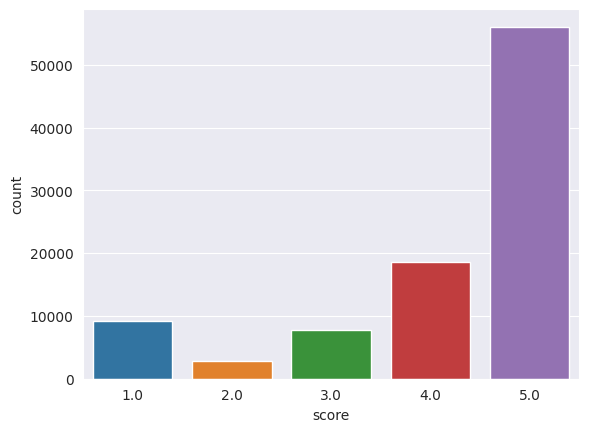

In [ ]:
sns.countplot(data=df_merged, x='score')

# Export

In [ ]:
path = f'/content/drive/MyDrive/Data Science/Projects/Olist/Output/Olist_features_V2.csv'
df_merged.to_csv(path, header=True)